In [10]:
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# which method was best per precinct
voters = pd.read_csv("cleaned_nov_votes.csv")
text_outreach = pd.read_csv("contact methods/TextBanking_Efforts.xlsx - Attempts.csv")
walk_outreach = pd.read_csv("contact methods/total_walk.csv")

# list of voters contacted through phone
phone_outreach = pd.read_csv("contact methods/phone_contacts.csv")
phone_contacts = phone_outreach[phone_outreach["Contact Outcome"] == "Talking to Correct Person"]
phone_contacts.drop_duplicates()
phone_contacts.dropna()
phone_ids = phone_contacts["Voter ID"].values.tolist()

# list of voters contacted through text
text_contacts = pd.read_csv("contact methods/success_text_data.csv")
text_ids = text_contacts["Voter ID"].values.tolist()

# list of voters contacted through walks
walk_contacts = pd.read_csv("contact methods/canvassed_walk.csv")
walk_ids = walk_contacts["VoterID"].values.tolist()

# list of voters contacted through mail
# turnout dicts
phone_turnout = {}
text_turnout = {}
walk_turnout = {}
mail_turnout = {}

In [12]:
text_voters = voters[voters["Voter ID"].isin(text_ids)]
phone_voter_id = voters["Voter ID"].values.tolist()

phone_contacted_ids = []
for elem in phone_ids:
    if str(elem).isdigit():
        phone_contacted_ids.append(int(elem))

phone_voters = voters[voters["Voter ID"].isin(phone_contacted_ids)]
walk_voters = voters[voters["Voter ID"].isin(walk_ids)]
text_contact_conversion = text_voters.shape[0]/len(text_ids)
text_overall_conversion = text_voters.shape[0]/text_outreach.shape[0]

phone_contact_conversion = phone_voters.shape[0]/len(phone_contacted_ids)
phone_overall_conversion = phone_voters.shape[0]/phone_outreach.shape[0]

walk_contact_conversion = walk_voters.shape[0]/len(walk_ids)
walk_overall_conversion = walk_voters.shape[0]/walk_outreach.shape[0]

        Unnamed: 0    Voter ID VOTE_TYPE    ZIP SEX  BIRTHYEAR Voting Site  \
4598          5545  1103153910         P  77009   F       1934     SRD145M   
30912        37543  1107676492         E  77033   F       1965       62025   
125249      151355  1104248838         E  77009   F       1977       92113   
146004      173563  1106105154         P  77093   F       1947     SRD142K   
163890      192836  1109169518         P  77506   F       1955     SRD144J   

        Voting Precinct  
4598                 44  
30912               238  
125249              637  
146004              171  
163890              301  


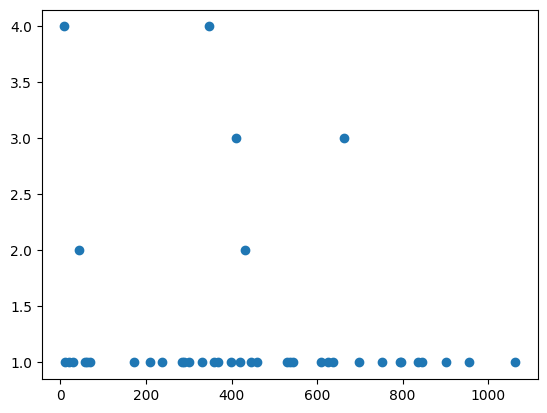

In [16]:
# best method per age:
# dict needs to be of form { age: [0, 1, 2], text: [4, 5, 6], door:[4, 5, 6], phone:}
print(text_voters.head())
age_text = []
age_walk = []
for idx, row in text_voters.iterrows():
    age = 2022 - row.loc["BIRTHYEAR"]
    precinct = row.loc["Voting Precinct"]
    sex = row.loc["SEX"]
    if age not in age_text.keys():
        age_text[age] = 1
    else:
        age_text[age] += 1
    if precinct not in precinct_text.keys():
        precinct_text[precinct] = 1
    else:
        precinct_text[precinct] +=  1
